In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import sys
import os

# ✅ Add project root to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.utils.config_loader import ConfigLoader

# Load config for labels
config = ConfigLoader()
label_map = config.get_labels()
label_names = list(label_map.values())

In [5]:
df = pd.read_csv('../data/labeled_data.csv')  # adjust path if needed
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (110000, 5)
Columns: ['label_name', 'label_iD', 'comment', 'language', 'label_id']
  label_name  label_iD                    comment language  label_id
0   bullying         1  तिमीलाई नसोधी कुरा नगर्नु   Nepali         0
1   bullying         1           व्यक्तिगत आक्रमण   Nepali         0
2   bullying         1           व्यक्तिगत आक्रमण   Nepali         0
3   bullying         1        यो कुनै हानी गर्दैन   Nepali         0
4   bullying         1         शान्त रह, केही छैन   Nepali         0


C:\Users\priya\AppData\Local\Temp\ipykernel_21204\2979826915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=class_counts.values, palette="viridis")


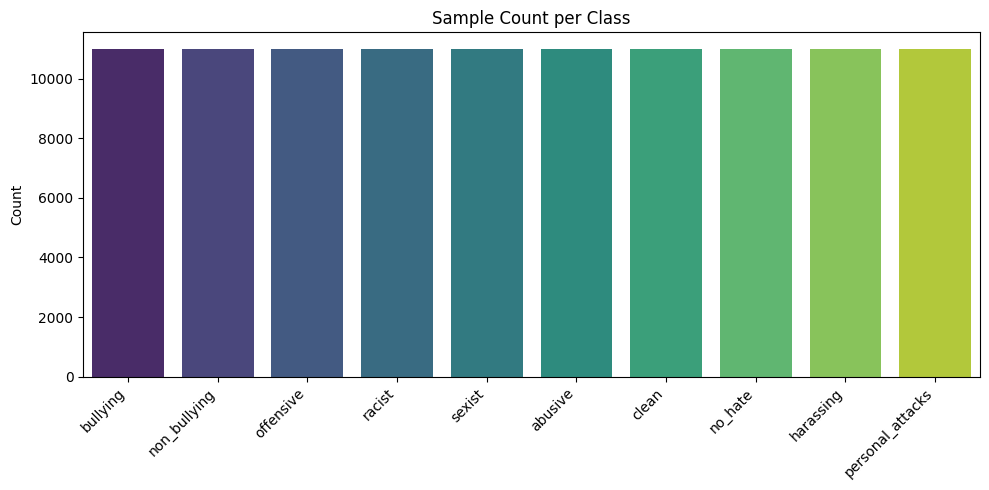

Class counts:
 label_id
0    11000
1    11000
2    11000
3    11000
4    11000
5    11000
6    11000
7    11000
8    11000
9    11000
Name: count, dtype: int64


In [6]:
class_counts = df['label_id'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=label_names, y=class_counts.values, palette="viridis")
plt.title('Sample Count per Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../saved_models/class_distribution.png', dpi=300)
plt.show()

print("Class counts:\n", class_counts)

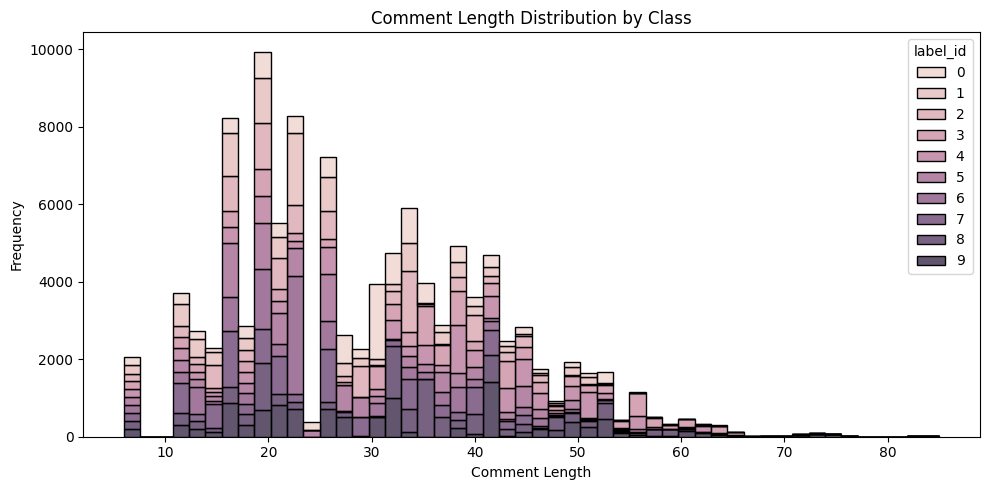

Avg. comment length per class:
 label_id
0    29.589818
1    24.919273
2    26.841000
3    36.300182
4    35.476273
5    26.859636
6    24.692455
7    25.711455
8    33.162364
9    32.017727
Name: comment_length, dtype: float64


In [7]:
df['comment_length'] = df['comment'].astype(str).str.len()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='comment_length', hue='label_id', bins=50, multiple='stack')
plt.title('Comment Length Distribution by Class')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Avg. comment length per class:\n", df.groupby('label_id')['comment_length'].mean())

In [8]:
for label_id, name in label_map.items():
    print(f"\n{name} samples:")
    samples = df[df['label_id'] == label_id]['comment'].sample(3, random_state=1).tolist()
    for s in samples:
        print("-", s)


bullying samples:
- Nessuno ti vuole qui, Luca.
- আমি তোমাকে পছন্দ করি না
- Eres un patético, Ana.

non_bullying samples:
- Grazie per l'aiuto.
- দুঃখিত
- Estoy de acuerdo con tu idea.

offensive samples:
- Qué asco de actitud.
- আমাকে না জিজ্ঞেস করে কথা বলবেন না
- Hablas como un idiota.

racist samples:
- வெளிநாட்டவர்கள் எங்கள் சமூகத்திற்கு பிரச்சனை தான்.
- শান্ত থাকো, কিছু নেই
- ఆ వ్యక్తి మన సంఘానికి సమస్యలు తెస్తారు.

sexist samples:
- Le donne dovrebbero stare a casa e badare ai figli.
- এটি খুব ভালো
- பெண்கள் வீடு பார்த்து இருக்க வேண்டும்.

abusive samples:
- నిశ్శబ్దంగా నుండు, ఉలికిపోడు.
- আমাকে না জিজ্ঞেস করে কথা বলবেন না
- Vai a farti vedere da uno psichiatra.

clean samples:
- Que tengas un buen día.
- দুঃখিত
- ਤੁਹਾਡਾ ਦਿਨ ਚੰਗਾ ਗੁਜ਼ਰੇ.

no_hate samples:
- நான் உங்களுடன் सहிம்.
- ব্যক্তিগত আক্রমণ
- நான் உங்களுடன் सहிம்.

harassing samples:
- ਮੁੜ ਕੇ ਨਾ ਆਉ, ਨਹੀਂ ਤਾਂ ਮੈਂ ਕਾਰਵਾਈ ਕਰਾਂਗਾ.
- দুঃখিত
- Continui così e faccio una denuncia.

personal_attacks samples:
- Non dovresti esiste

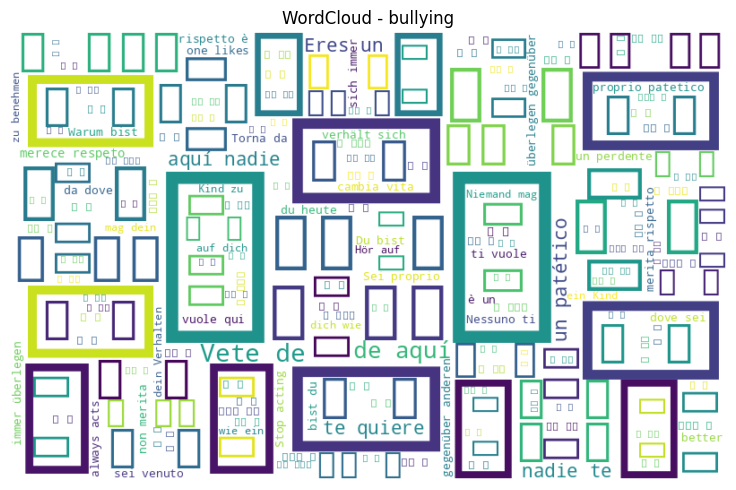

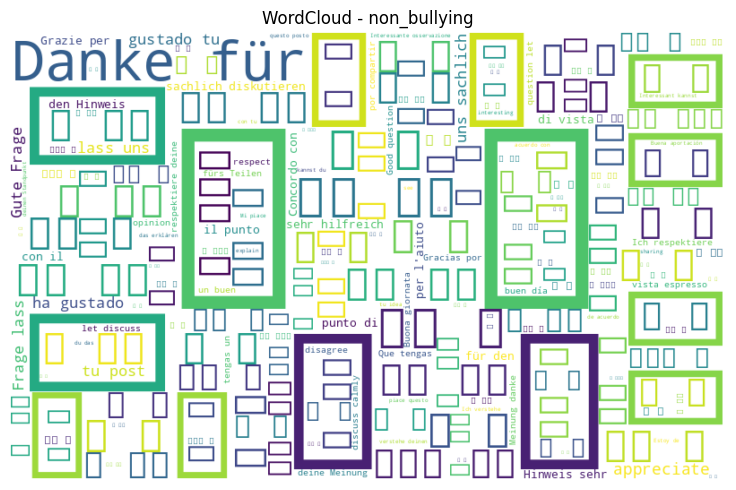

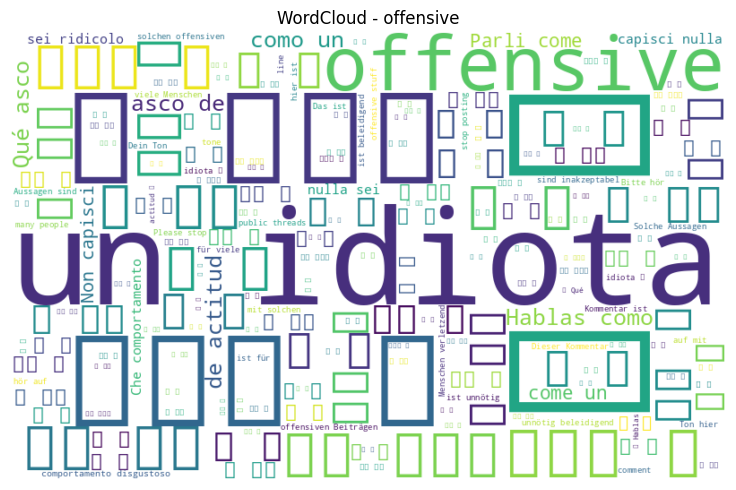

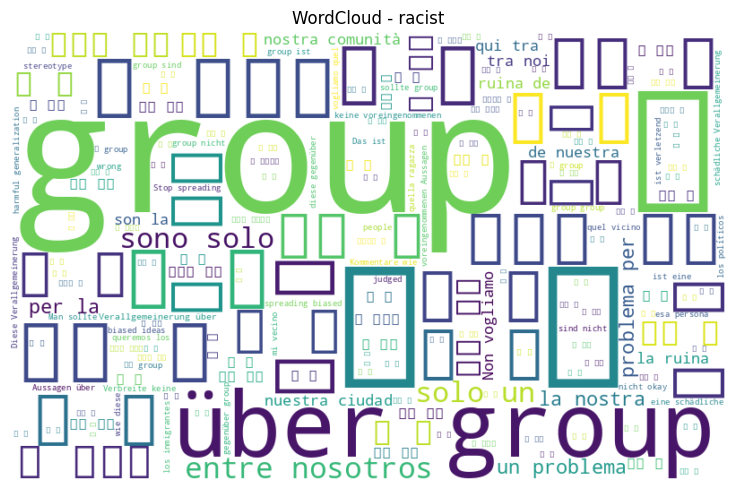

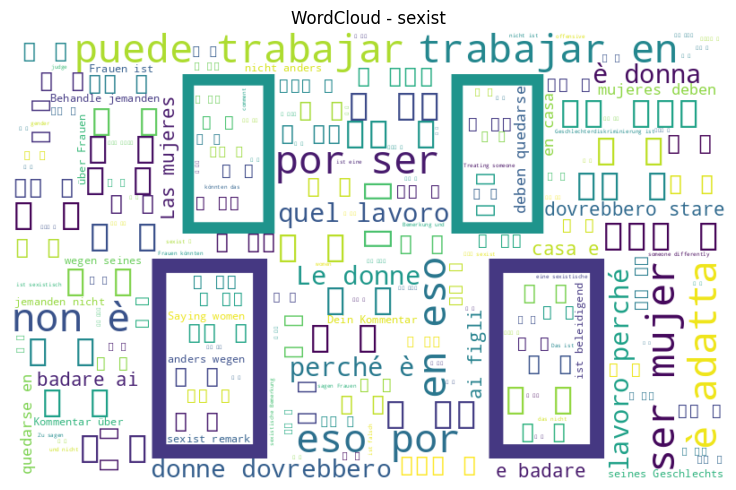

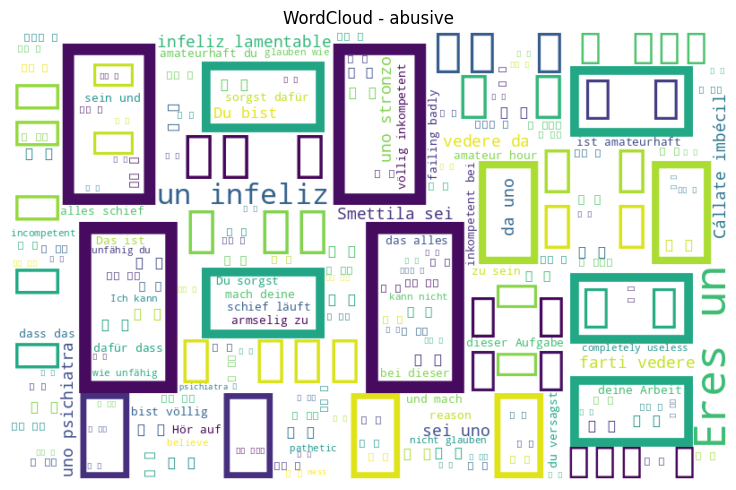

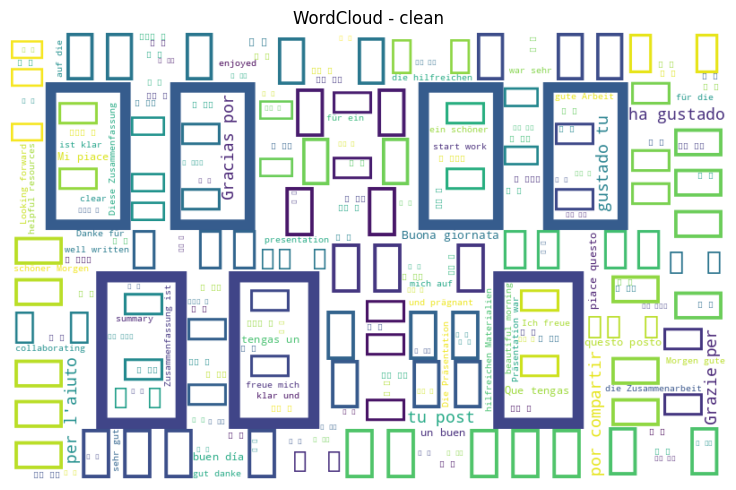

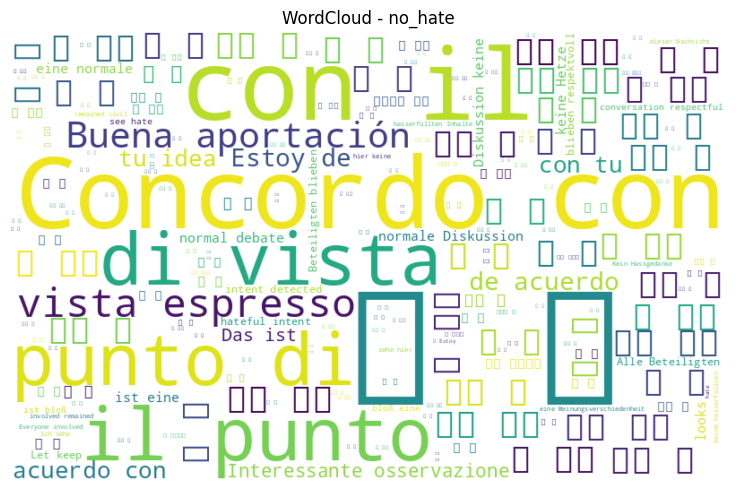

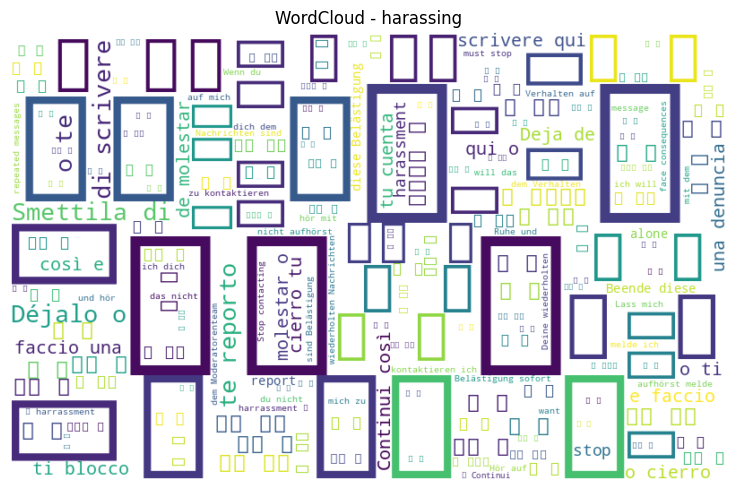

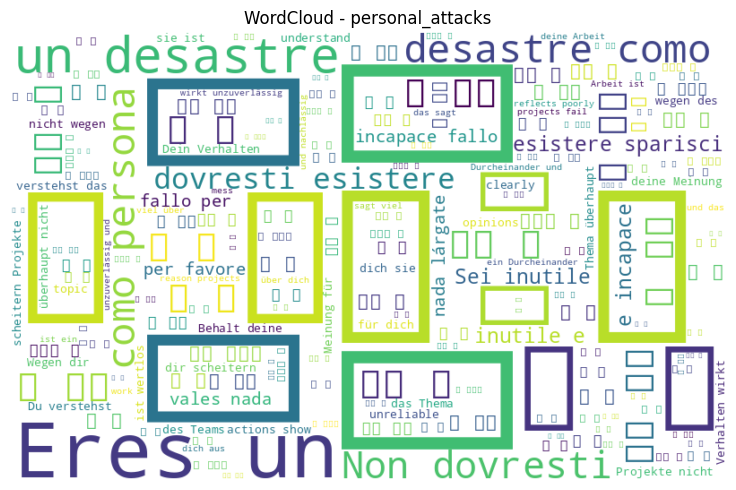

In [9]:
for label_id, name in label_map.items():
    text = ' '.join(df[df['label_id'] == label_id]['comment'].astype(str))
    if text.strip():  # avoid empty wordclouds
        wc = WordCloud(width=800, height=500, background_color='white').generate(text)
        plt.figure(figsize=(8,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud - {name}')
        plt.tight_layout()
        plt.savefig(f'../saved_models/wordcloud_{name.replace(" ", "_").lower()}.png', dpi=300)
        plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_21204\3335468427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette="Set2")


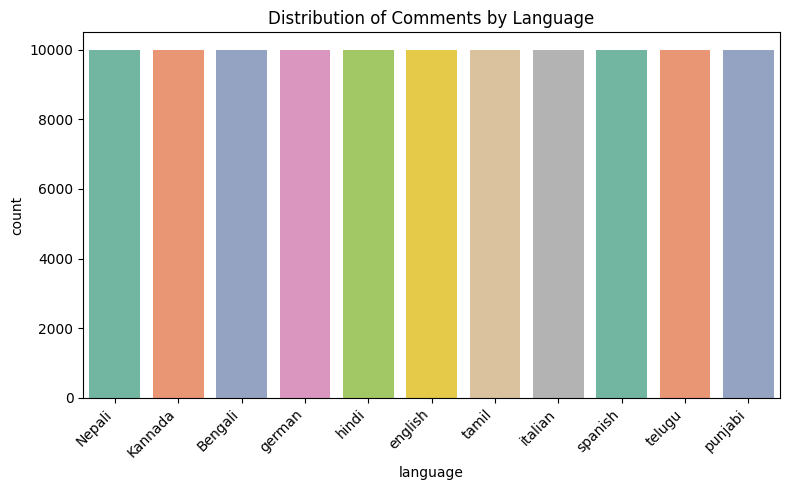

Language counts:
 language
Nepali     10000
Kannada    10000
Bengali    10000
german     10000
hindi      10000
english    10000
tamil      10000
italian    10000
spanish    10000
telugu     10000
punjabi    10000
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette="Set2")
plt.title('Distribution of Comments by Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../saved_models/language_distribution.png', dpi=300)
plt.show()

print("Language counts:\n", df['language'].value_counts())